## Jay Sanjaykumar Beladiya
### DATA6550 Group 3
#### Group Project 2

### Section 1: Exploring the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/train.csv")


In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.shape)

(891, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Check missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Survival distribution
print("\nSurvival Counts:")
print(df["Survived"].value_counts())


Survival Counts:
Survived
0    549
1    342
Name: count, dtype: int64


#### Summary
This dataset contains 12 variables and 891 passengers, including survival status and ticket details.
- The dataset includes both numerical variables (e.g., Age, Fare, Pclass) and categorical variables (e.g., Sex, Embarked, Cabin).
- The Survived variable shows that 549 passengers did not survive and 342 passengers survived.
- There is a little bit of missing data:
    - Age : 177
    - Cabin : 687
    - Embarked : 2


### Section 2 : Accurate Visualizations

<Figure size 640x480 with 0 Axes>

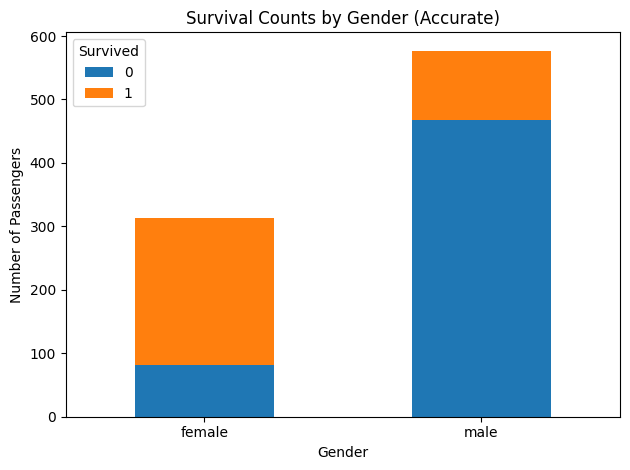

In [10]:
survival_gender_counts = df.groupby(["Sex", "Survived"]).size().unstack()

plt.figure()
survival_gender_counts.plot(kind="bar", stacked=True)
plt.title("Survival Counts by Gender (Accurate)")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

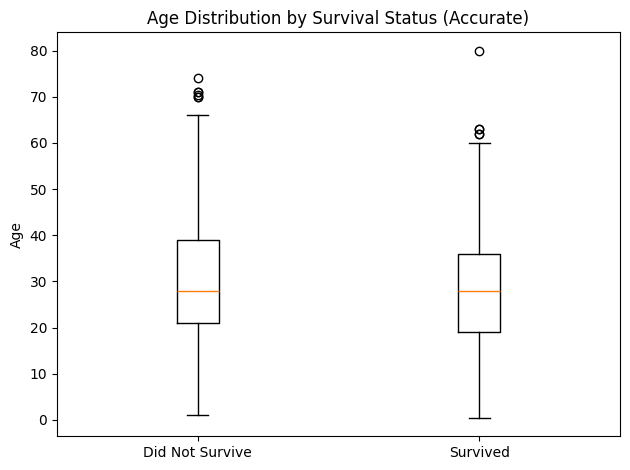

In [18]:
# Age distribution by survival status 
survived_age = df[df["Survived"] == 1]["Age"].dropna()
not_survived_age = df[df["Survived"] == 0]["Age"].dropna()

plt.figure()
plt.boxplot([not_survived_age, survived_age])
plt.title("Age Distribution by Survival Status (Accurate)")
plt.ylabel("Age")
plt.xticks([1, 2], ["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()

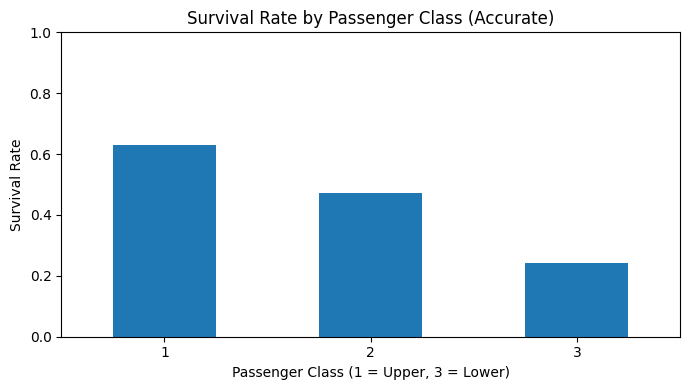

In [ ]:
# Survival rates by passenger class
survival_by_class = df.groupby("Pclass")["Survived"].mean().sort_index()

plt.figure(figsize=(7, 4))
survival_by_class.plot(kind="bar")
plt.title("Survival Rate by Passenger Class (Accurate)")
plt.xlabel("Passenger Class (1 = Upper, 3 = Lower)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)  
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Section 3: Misleading Visualizations

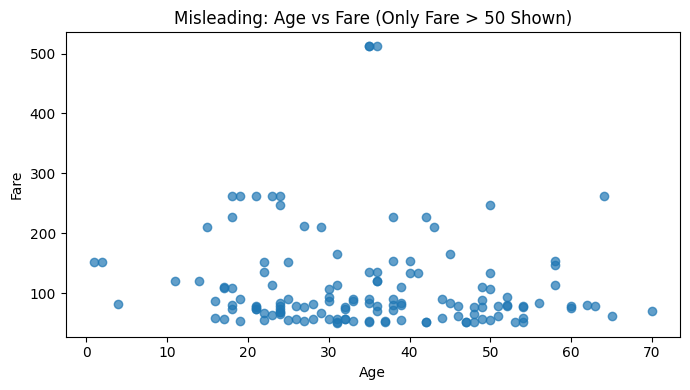

In [14]:
high_fare = df[df["Fare"] > 50]  # CHERRY-PICKED subset

plt.figure(figsize=(7, 4))
plt.scatter(high_fare["Age"], high_fare["Fare"], alpha=0.7)
plt.title("Misleading: Age vs Fare (Only Fare > 50 Shown)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

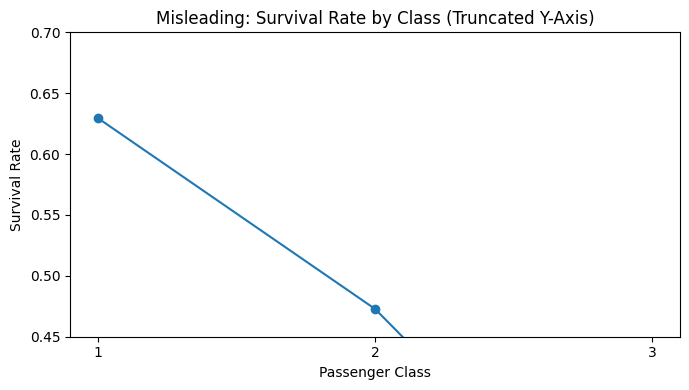

In [ ]:
# Shortened Y-axis to exaggerate differences in survival rates by class
survival_by_class = df.groupby("Pclass")["Survived"].mean().sort_index()

plt.figure(figsize=(7, 4))
plt.plot(survival_by_class.index, survival_by_class.values, marker="o")
plt.title("Misleading: Survival Rate by Class (Truncated Y-Axis)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

plt.ylim(0.45, 0.70) 
plt.xticks([1, 2, 3])
plt.tight_layout()
plt.show()